# Experiment's Exploratory Data Analisys

Explores the results of the experiments.

In [1]:
% matplotlib inline
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pymongo import MongoClient

db = MongoClient().imdbws
df = pd.DataFrame(list(db.exp_0.find())).set_index('_id')
df = df.drop(['title', 'ypct_rating', 'ypct_votes'], axis=1)

Best features by correlations to `ypct` and `top100`:

In [2]:
c = df[df.columns.drop(labels=['top100'])].corr(method='spearman')['ypct']
order = c.abs().sort_values(ascending = False).index
print(c[order].iloc[1:].head(10))

ego_previous_votes_maximum     0.715984
ego_previous_votes_mean        0.708459
ego_previous_votes_median      0.707997
team_previous_votes            0.688257
ego_previous_votes_minimum     0.578802
ego_previous_rating_std_dev    0.508959
team_closeness                 0.392437
team_size                      0.390052
ego_closeness_maximum          0.378192
ego_closeness_minimum          0.369298
Name: ypct, dtype: float64


In [3]:
result = []
for x in df.columns:
    c = stats.pointbiserialr(df[x], df['top100'])
    result.append((c.correlation, c.pvalue, x))
for x in sorted(result, key=lambda x: abs(x[0]), reverse=True)[:10]:
    print("{:35} {:.4f} (p-value: {:.4f})".format(x[2], x[0], x[1]))

ego_closeness_minimum               0.1856 (p-value: 0.0000)
ego_closeness_mean                  0.1846 (p-value: 0.0000)
ego_closeness_median                0.1832 (p-value: 0.0000)
ego_closeness_maximum               0.1823 (p-value: 0.0000)
ego_network_constraint_mean         -0.1206 (p-value: 0.0000)
ego_network_constraint_median       -0.1194 (p-value: 0.0000)
ego_network_constraint_maximum      -0.1030 (p-value: 0.0000)
ego_network_constraint_minimum      -0.1005 (p-value: 0.0000)
ego_network_constraint_std_dev      -0.0815 (p-value: 0.0000)
ego_degree_maximum                  0.0796 (p-value: 0.0000)


## Previous Votes

Scatter plot of `previous_votes` features and `ypct`:

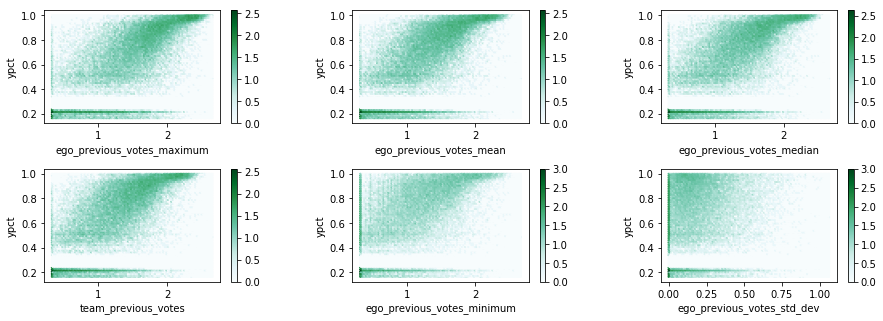

In [4]:
f = ['ego_previous_votes_maximum',
'ego_previous_votes_mean',
'ego_previous_votes_median',
'team_previous_votes',
'ego_previous_votes_minimum',
'ego_previous_votes_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')

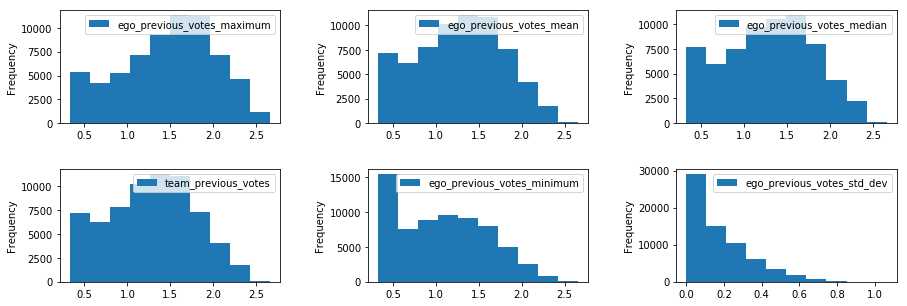

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

Plot with boxplots of `ego_previous_votes_maximum` every year:

In [6]:
dfx[f[:-2]].corr()

,ego_previous_votes_maximum,ego_previous_votes_mean,ego_previous_votes_median,team_previous_votes,ego_previous_votes_minimum,ego_previous_votes_std_dev
ego_previous_votes_maximum,1.000000,0.937228,0.924667,0.909618,0.726583,0.381499
ego_previous_votes_mean,0.937228,1.000000,0.988789,0.962474,0.908854,0.052633
ego_previous_votes_median,0.924667,0.988789,1.000000,0.953693,0.872927,0.080828
team_previous_votes,0.909618,0.962474,0.953693,1.000000,0.864288,0.078292
ego_previous_votes_minimum,0.726583,0.908854,0.872927,0.864288,1.000000,-0.345289
ego_previous_votes_std_dev,0.381499,0.052633,0.080828,0.078292,-0.345289,1.000000


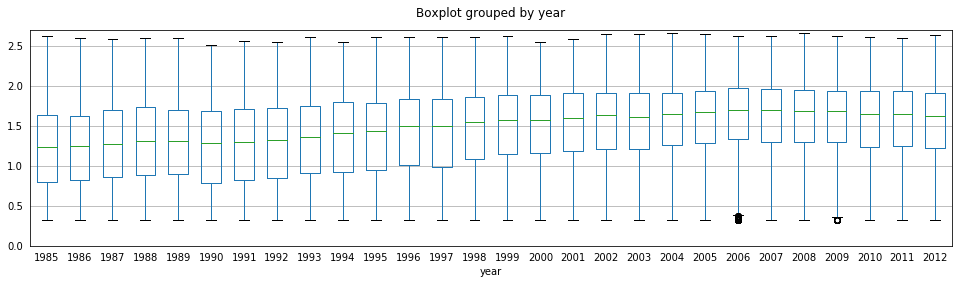

In [7]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_previous_votes_maximum', by='year', figsize=(16,4), widths=0.6)
ax.set_ylim(0, 2.7)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Previous Ratings

Scatter plot of `previous_ratings` features and `ypct`:

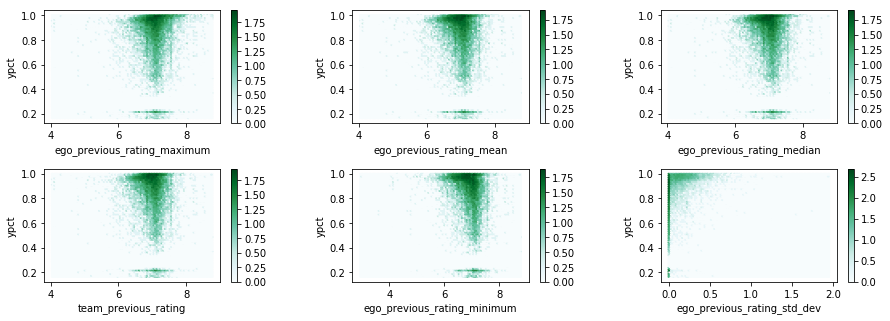

In [8]:
f = ['ego_previous_rating_maximum',
'ego_previous_rating_mean',
'ego_previous_rating_median',
'team_previous_rating',
'ego_previous_rating_minimum',
'ego_previous_rating_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

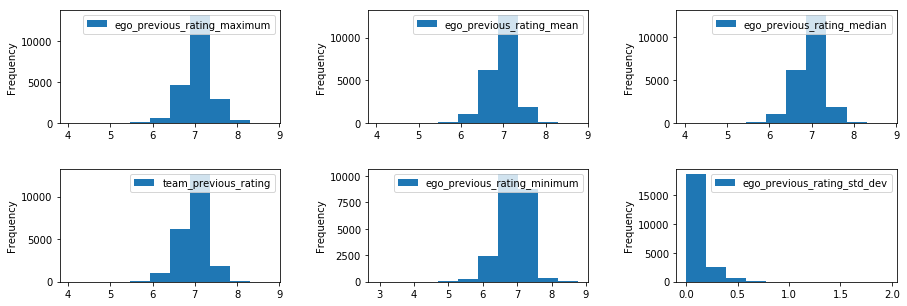

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [10]:
dfx[f[:-2]].corr()

,ego_previous_rating_maximum,ego_previous_rating_mean,ego_previous_rating_median,team_previous_rating,ego_previous_rating_minimum,ego_previous_rating_std_dev
ego_previous_rating_maximum,1.000000,0.897586,0.877002,0.878194,0.667292,0.283830
ego_previous_rating_mean,0.897586,1.000000,0.989286,0.974131,0.917394,-0.149521
ego_previous_rating_median,0.877002,0.989286,1.000000,0.964716,0.894059,-0.143488
team_previous_rating,0.878194,0.974131,0.964716,1.000000,0.888877,-0.133508
ego_previous_rating_minimum,0.667292,0.917394,0.894059,0.888877,1.000000,-0.514440
ego_previous_rating_std_dev,0.283830,-0.149521,-0.143488,-0.133508,-0.514440,1.000000


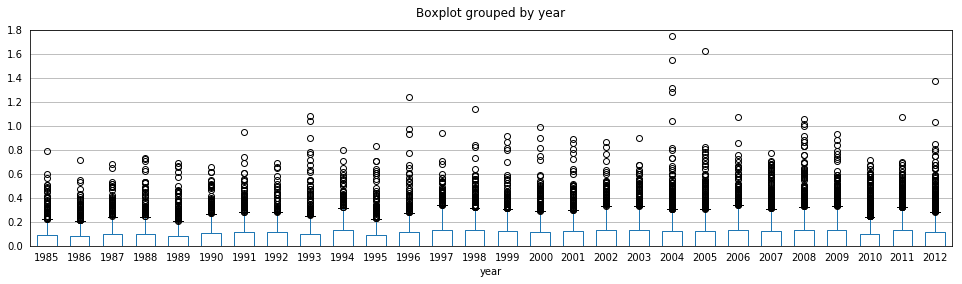

In [11]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_previous_rating_std_dev', by='year', figsize=(16,4), widths=0.6)
ax.set_ylim(0, 1.8)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

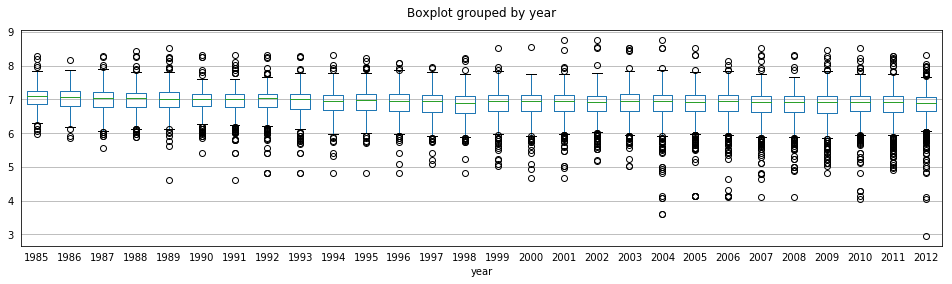

In [12]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_previous_rating_minimum', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Closeness

Scatter plot of `closeness` features and `ypct`:

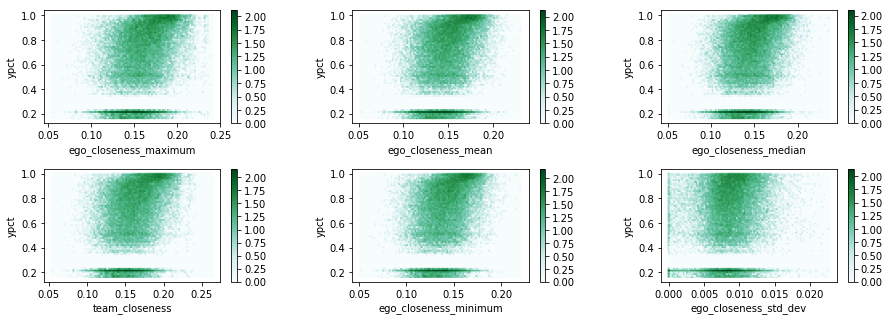

In [13]:
f = ['ego_closeness_maximum',
'ego_closeness_mean',
'ego_closeness_median',
'team_closeness',
'ego_closeness_minimum',
'ego_closeness_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

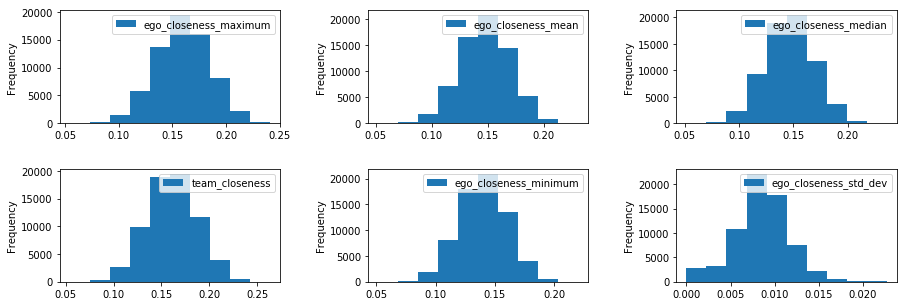

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [15]:
dfx[f[:-2]].corr()

,ego_closeness_maximum,ego_closeness_mean,ego_closeness_median,team_closeness,ego_closeness_minimum,ego_closeness_std_dev
ego_closeness_maximum,1.000000,0.981174,0.947358,0.996016,0.969540,0.634885
ego_closeness_mean,0.981174,1.000000,0.987620,0.985298,0.989709,0.526841
ego_closeness_median,0.947358,0.987620,1.000000,0.956241,0.969127,0.472968
team_closeness,0.996016,0.985298,0.956241,1.000000,0.975143,0.596655
ego_closeness_minimum,0.969540,0.989709,0.969127,0.975143,1.000000,0.443458
ego_closeness_std_dev,0.634885,0.526841,0.472968,0.596655,0.443458,1.000000


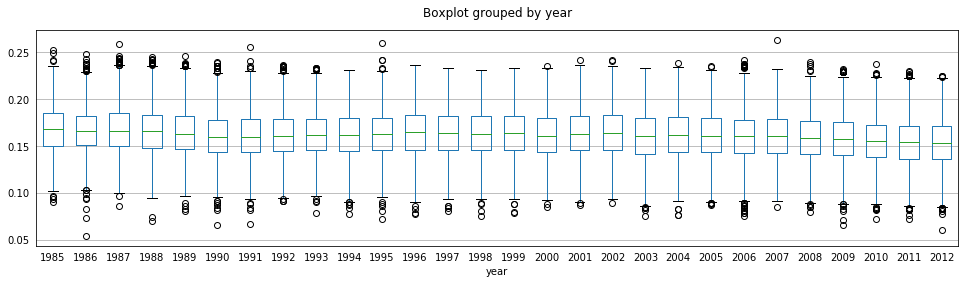

In [16]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_closeness', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Team Size

Scatter plot of `team_size` and `ypct`:

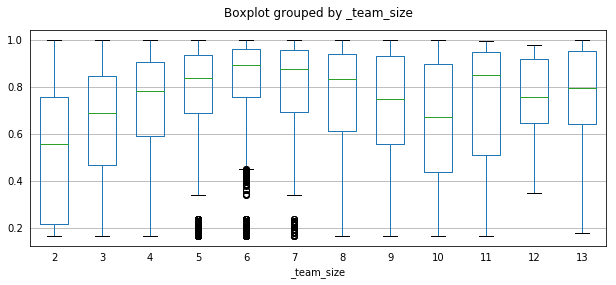

In [17]:
df['_team_size'] = df.team_size.map(lambda x: x if x < 13 else 13)
ax = df.boxplot('ypct', by='_team_size', figsize=(10,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

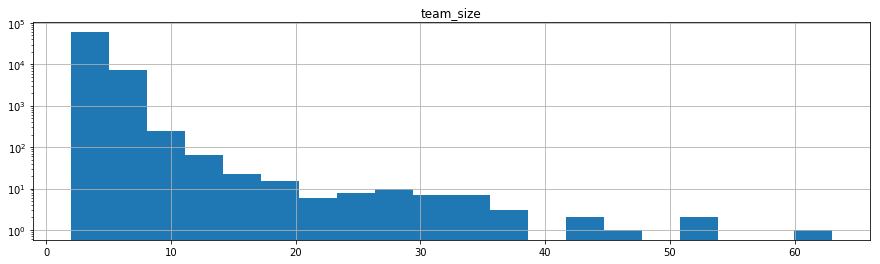

In [18]:
ax = df.hist('team_size', log=True, bins=20, figsize=(15,4))

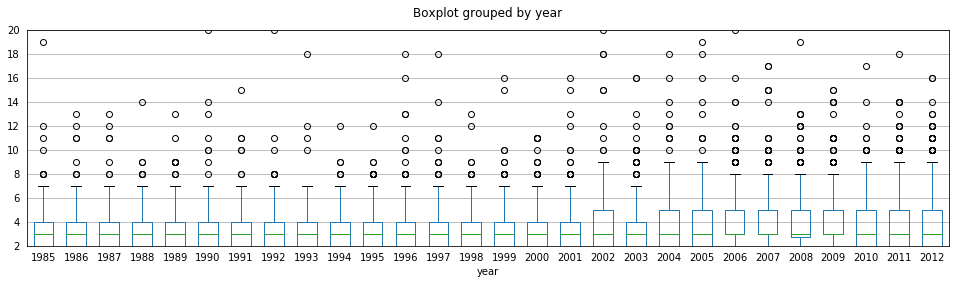

In [19]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_size', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(2, 20)
ax.xaxis.grid(False)

## Network Constraint

Scatter plot of `network_constraint` features and `ypct`:

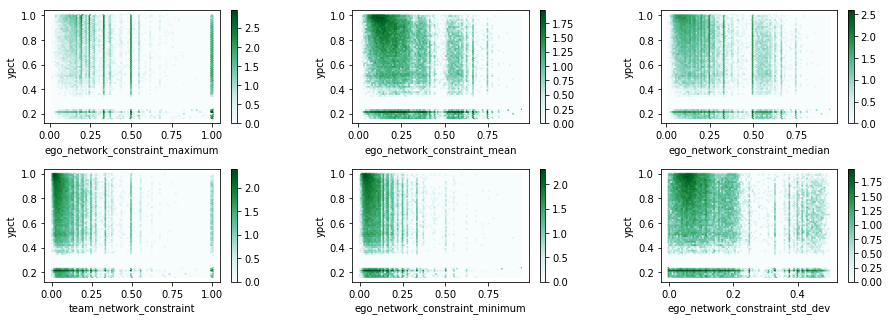

In [20]:
f = ['ego_network_constraint_maximum',
'ego_network_constraint_mean',
'ego_network_constraint_median',
'team_network_constraint',
'ego_network_constraint_minimum',
'ego_network_constraint_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

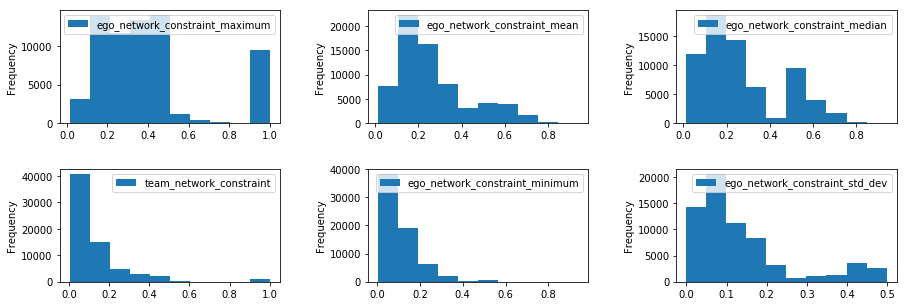

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [22]:
dfx[f[:-2]].corr()

,ego_network_constraint_maximum,ego_network_constraint_mean,ego_network_constraint_median,team_network_constraint,ego_network_constraint_minimum,ego_network_constraint_std_dev
ego_network_constraint_maximum,1.000000,0.948677,0.865589,0.417590,0.473208,0.945824
ego_network_constraint_mean,0.948677,1.000000,0.962457,0.612079,0.680126,0.817499
ego_network_constraint_median,0.865589,0.962457,1.000000,0.596117,0.635225,0.744403
team_network_constraint,0.417590,0.612079,0.596117,1.000000,0.860643,0.156550
ego_network_constraint_minimum,0.473208,0.680126,0.635225,0.860643,1.000000,0.171443
ego_network_constraint_std_dev,0.945824,0.817499,0.744403,0.156550,0.171443,1.000000


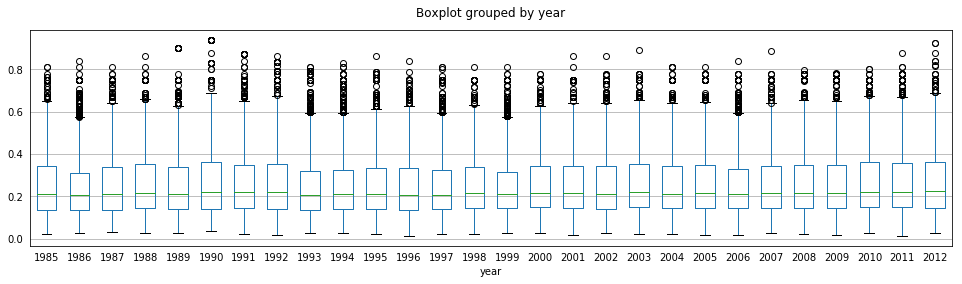

In [23]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_network_constraint_mean', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Shared Collaborators in Pairs

Scatter plot of `pair_shared_collaborators` features and `ypct`:

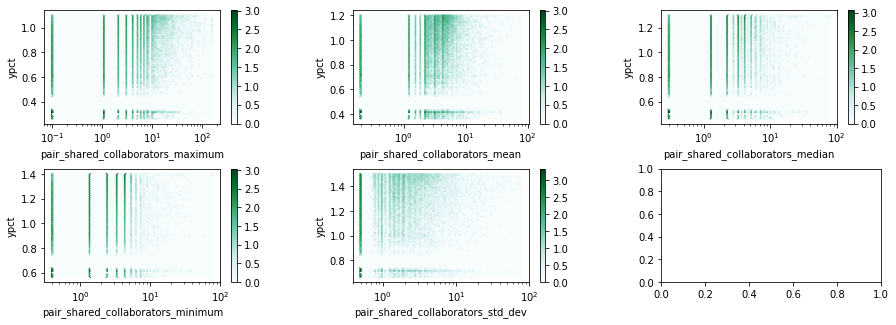

In [24]:
f = ['pair_shared_collaborators_maximum',
'pair_shared_collaborators_mean',
'pair_shared_collaborators_median',
'pair_shared_collaborators_minimum',
'pair_shared_collaborators_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    dfx = dfx.add(0.1, axis=[x])
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log', xscale='log')    

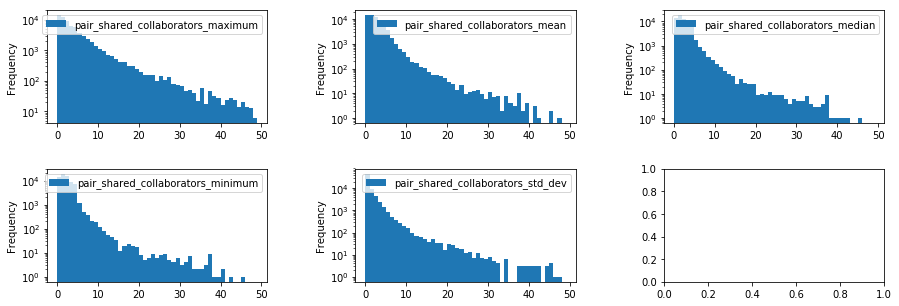

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], bins=range(0,50), logy=True)

In [26]:
dfx[f[:-2]].corr()

,pair_shared_collaborators_maximum,pair_shared_collaborators_mean,pair_shared_collaborators_median,pair_shared_collaborators_minimum,pair_shared_collaborators_std_dev
pair_shared_collaborators_maximum,1.000000,0.794465,0.533277,0.447984,0.930193
pair_shared_collaborators_mean,0.794465,1.000000,0.898231,0.836032,0.647647
pair_shared_collaborators_median,0.533277,0.898231,1.000000,0.942914,0.288340
pair_shared_collaborators_minimum,0.447984,0.836032,0.942914,1.000000,0.171909
pair_shared_collaborators_std_dev,0.930193,0.647647,0.288340,0.171909,1.000000


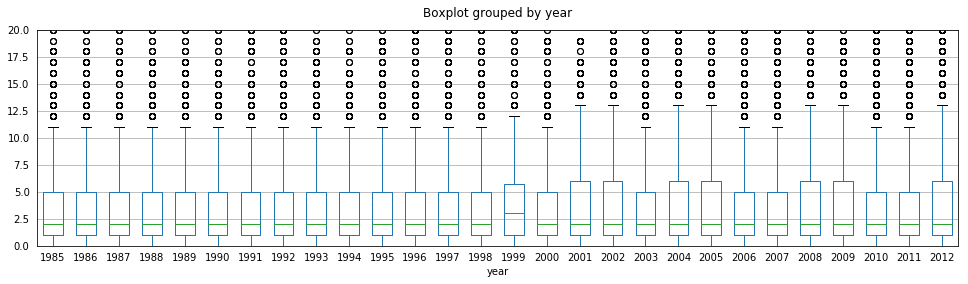

In [27]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('pair_shared_collaborators_maximum', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 20)
ax.xaxis.grid(False)

## Neighbour Overlap in Pairs

Scatter plot of `pair_neighbour_overlap` features and `ypct`:

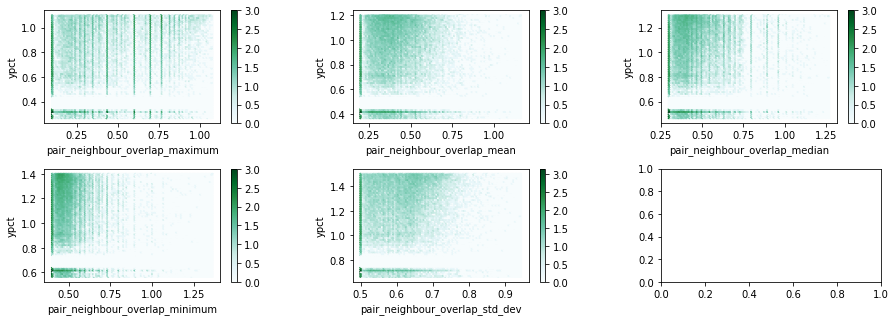

In [28]:
f = ['pair_neighbour_overlap_maximum',
'pair_neighbour_overlap_mean',
'pair_neighbour_overlap_median',
'pair_neighbour_overlap_minimum',
'pair_neighbour_overlap_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    dfx = dfx.add(0.1, axis=[x])
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

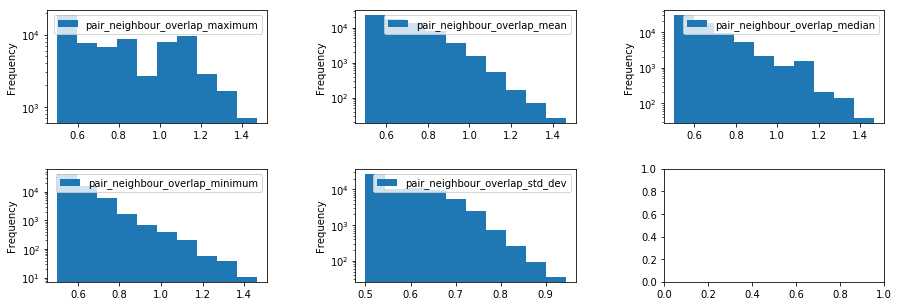

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [30]:
dfx[f[:-2]].corr()

,pair_neighbour_overlap_maximum,pair_neighbour_overlap_mean,pair_neighbour_overlap_median,pair_neighbour_overlap_minimum,pair_neighbour_overlap_std_dev
pair_neighbour_overlap_maximum,1.000000,0.861835,0.712899,0.575215,0.894162
pair_neighbour_overlap_mean,0.861835,1.000000,0.943179,0.865519,0.651304
pair_neighbour_overlap_median,0.712899,0.943179,1.000000,0.859561,0.467237
pair_neighbour_overlap_minimum,0.575215,0.865519,0.859561,1.000000,0.234104
pair_neighbour_overlap_std_dev,0.894162,0.651304,0.467237,0.234104,1.000000


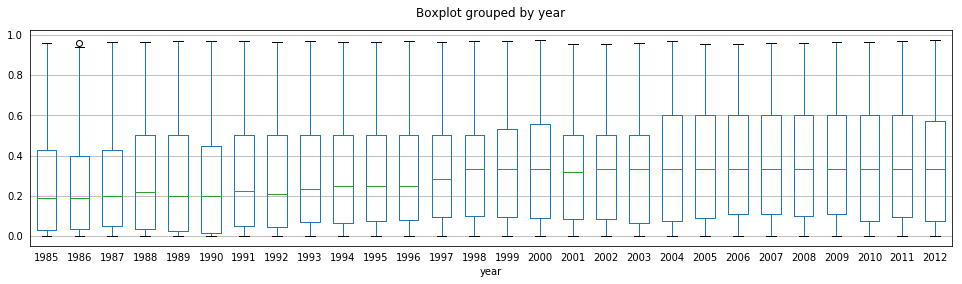

In [31]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('pair_neighbour_overlap_maximum', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Degree

Scatter plot of `degree` features and `ypct`:

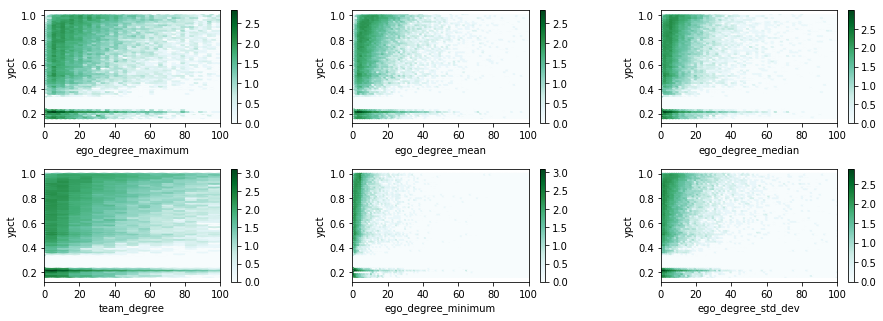

In [32]:
f = ['ego_degree_maximum',
'ego_degree_mean',
'ego_degree_median',
'team_degree',
'ego_degree_minimum',
'ego_degree_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 100)

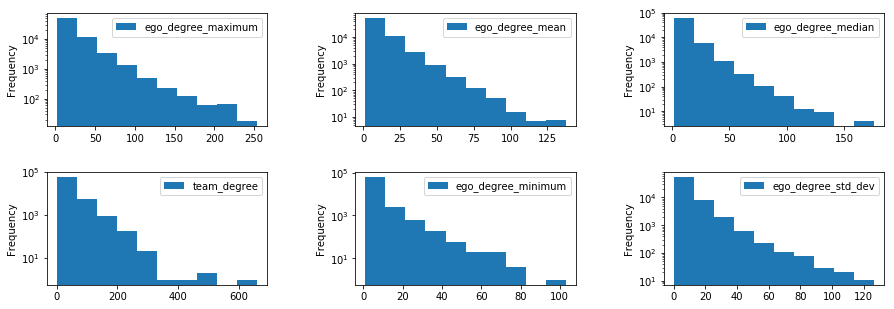

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [34]:
dfx[f[:-2]].corr()

,ego_degree_maximum,ego_degree_mean,ego_degree_median,team_degree,ego_degree_minimum,ego_degree_std_dev
ego_degree_maximum,1.000000,0.910275,0.640345,0.939796,0.347129,0.967921
ego_degree_mean,0.910275,1.000000,0.877411,0.916222,0.584959,0.846749
ego_degree_median,0.640345,0.877411,1.000000,0.719398,0.610387,0.562878
team_degree,0.939796,0.916222,0.719398,1.000000,0.442922,0.863462
ego_degree_minimum,0.347129,0.584959,0.610387,0.442922,1.000000,0.152645
ego_degree_std_dev,0.967921,0.846749,0.562878,0.863462,0.152645,1.000000


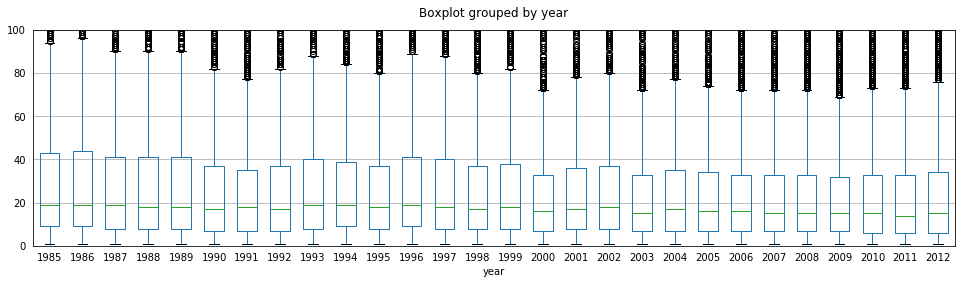

In [35]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_degree', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 100)
ax.xaxis.grid(False)

## Past Experience

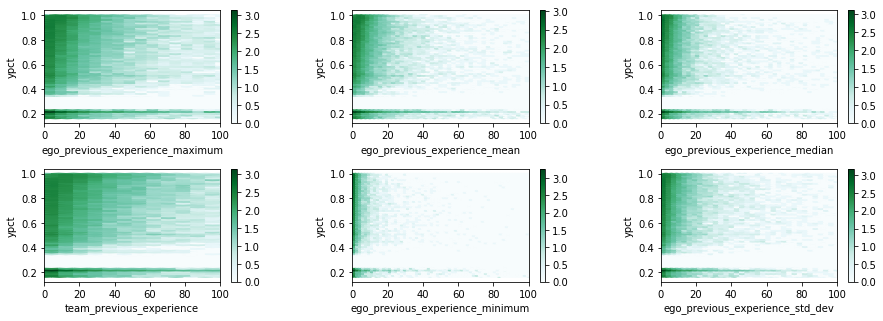

In [36]:
f = ['ego_previous_experience_maximum',
'ego_previous_experience_mean',
'ego_previous_experience_median',
'team_previous_experience',
'ego_previous_experience_minimum',
'ego_previous_experience_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 100)

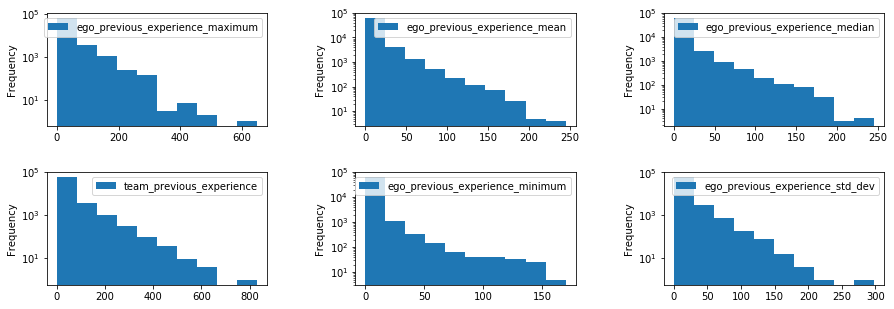

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [38]:
dfx[f[:-2]].corr()

,ego_previous_experience_maximum,ego_previous_experience_mean,ego_previous_experience_median,team_previous_experience,ego_previous_experience_minimum,ego_previous_experience_std_dev
ego_previous_experience_maximum,1.000000,0.913786,0.712634,0.948960,0.415202,0.969926
ego_previous_experience_mean,0.913786,1.000000,0.920164,0.899159,0.678206,0.836644
ego_previous_experience_median,0.712634,0.920164,1.000000,0.741016,0.723614,0.619399
team_previous_experience,0.948960,0.899159,0.741016,1.000000,0.456753,0.884995
ego_previous_experience_minimum,0.415202,0.678206,0.723614,0.456753,1.000000,0.216758
ego_previous_experience_std_dev,0.969926,0.836644,0.619399,0.884995,0.216758,1.000000


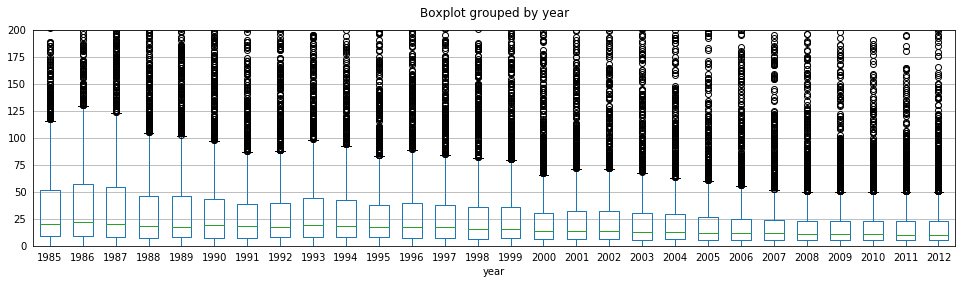

In [39]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_previous_experience', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 200)
ax.xaxis.grid(False)

## Betweenness 
`ego_betweenness_maximum`

## Pair Past Experience

`pair_past_experience_mean`

## Clustering
`ego_clustering_maximum`

## Square Clustering
`ego_square_clustering_maximum`